In [5]:
%matplotlib inline

In [25]:
import pandas as pd
import numpy as np

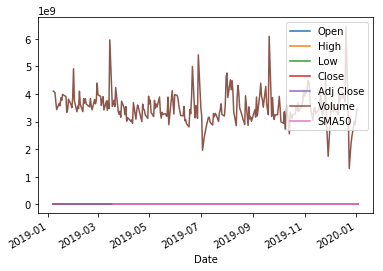

In [26]:
data = pd.read_csv('SP.csv', index_col='Date', parse_dates=['Date'])
data['SMA50'] = data['Close'].rolling(50).mean()
data.plot()

In [27]:
data['SMA100'] = data['Close'].rolling(100).mean()

In [28]:
#Set to 1 if SMA50 is above SMA100 ,if not set to 0
data['Position'] = np.where(data['SMA50'] > data['SMA100'], 1 , 0)

In [31]:
#buy with a lag(1) day , shift the column
data['Position'] = data['Position'].shift()

In [34]:
#calculating the daily % returns of strategy
data['StrategyPct'] = data['Close'].pct_change(1) * data['Position']

# multiply with position with is 1 if SMA50 > SMA 100 or if not , 0 

In [35]:
#calculating cumulative returns
data['Strategy'] = (data['StrategyPct'] + 1 ).cumprod()

In [40]:
data['BuyHold'] = (data['Close'].pct_change(1) + 1 ).cumprod()

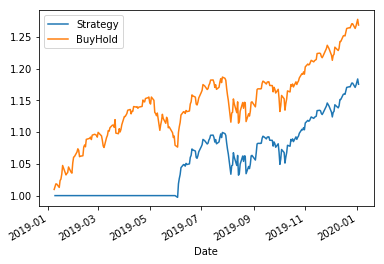

In [41]:
data[['Strategy', 'BuyHold']].plot()

In [42]:
data.head(200)

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA100,Position,StrategyPct,Strategy,BuyHold
Date,,,,,,,,,,,,
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000,NaN,NaN,NaN,NaN,NaN,1.009695
2019-01-09,2580.000000,2595.320068,2568.889893,2584.959961,2584.959961,4052480000,NaN,NaN,0.0,0.000000,1.000000,1.013833
2019-01-10,2573.510010,2597.820068,2562.020020,2596.639893,2596.639893,3704500000,NaN,NaN,0.0,0.000000,1.000000,1.018414
2019-01-11,2588.110107,2596.270020,2577.399902,2596.260010,2596.260010,3434490000,NaN,NaN,0.0,-0.000000,1.000000,1.018265
2019-01-14,2580.310059,2589.320068,2570.409912,2582.610107,2582.610107,3664450000,NaN,NaN,0.0,-0.000000,1.000000,1.012911
2019-01-15,2585.100098,2613.080078,2585.100098,2610.300049,2610.300049,3572330000,NaN,NaN,0.0,0.000000,1.000000,1.023772
2019-01-16,2614.750000,2625.760010,2612.679932,2616.100098,2616.100098,3863770000,NaN,NaN,0.0,0.000000,1.000000,1.026046
2019-01-17,2609.280029,2645.060059,2606.360107,2635.959961,2635.959961,3772270000,NaN,NaN,0.0,0.000000,1.000000,1.033835


In [43]:
#first few SMAs are NaN because it hasn't reached 50 and 100 trading days yet
